In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from IPython.display import Image

import seaborn as sns
import matplotlib.pylab as plt

plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

In [3]:
store = pd.read_csv('data/소상공인시장진흥공단_상가정보_서울.csv', encoding='utf-8')
#데이터 불러오기

In [4]:
columns = store.columns
print(columns)
#필요한 열만 가져오기위해 열 이름 확인

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')


In [5]:
selected_columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '법정동코드','법정동명','시군구명']
store = store[selected_columns]

print(store)
#필요한 열만 골라내기

                상호명 상권업종대분류명 상권업종중분류명    상권업종소분류명       법정동코드   법정동명  시군구명
0            영자's곱창       음식       한식    곱창 전골/구이  1121510100    중곡동   광진구
1             호텔클로이       숙박    일반 숙박       여관/모텔  1114014500  광희동1가    중구
2         나라차중계태권도장       교육    기타 교육    태권도/무술학원  1135010600    중계동   노원구
3             이상한스냅    과학·기술    사진 촬영       사진촬영업  1147010300    신월동   양천구
4               토끼정       음식       한식      백반/한정식  1150010500    마곡동   강서구
...             ...      ...      ...         ...         ...    ...   ...
474255  행복한부동산중개사무소      부동산  부동산 서비스  부동산 중개/대리업  1147010300    신월동   양천구
474256    좋은소식법률사무소    과학·기술    법무관련          변호사  1121510700    화양동   광진구
474257          루젤라       음식      서양식         경양식  1168010800    논현동   강남구
474258        153커피    수리·개인  가전제품 수리    가전제품 수리업  1156012800  양평동4가  영등포구
474259         송죽상회       소매   식료품 소매  건어물/젓갈 소매업  1114015100  을지로5가    중구

[474260 rows x 7 columns]


In [14]:
store = store.loc[store['상권업종대분류명'].isin(['음식', '소매'])]
print(store)
#상권업종대분류명 카테고리 중, 대학생 자취와 밀접하게 관련있는 음식, 소매 두개 카테고리만 나타내기

             상호명 상권업종대분류명     상권업종중분류명    상권업종소분류명       법정동코드    법정동명  시군구명
0         영자's곱창       음식           한식    곱창 전골/구이  1121510100     중곡동   광진구
4            토끼정       음식           한식      백반/한정식  1150010500     마곡동   강서구
5       스쿨푸드딜리버리       음식        기타 간이    김밥/만두/분식  1130510300     수유동   강북구
6            가배차       음식           한식      백반/한정식  1171010400     송파동   송파구
7       비에이치씨항동점       음식        기타 간이          치킨  1153011200      항동   구로구
...          ...      ...          ...         ...         ...     ...   ...
474246    비기닝브레드       음식        기타 간이        빵/도넛  1135010300     공릉동   노원구
474250      용두홍어       음식           한식          횟집  1123010700    청량리동  동대문구
474251      신사답게       소매  섬유·의복·신발 소매   여성 의류 소매업  1156010400  영등포동3가  영등포구
474257       루젤라       음식          서양식         경양식  1168010800     논현동   강남구
474259      송죽상회       소매       식료품 소매  건어물/젓갈 소매업  1114015100   을지로5가    중구

[233707 rows x 7 columns]


In [17]:
store = store.loc[store['상권업종대분류명'].isin(['음식', '소매'])]
print(store)
excluded_categories = ['애완동물·용품 소매', '가구 소매', '담배 소매', '모터사이클 소매', '철물·건설자재 소매', '자동차 부품 소매', '연료 소매', '식물 소매', '비알코올', '식료품 소매', '동남아시아']
store = store[~store['상권업종중분류명'].isin(excluded_categories)]
store
#대학생 자취와 관련없는 카테고리 중분류안에서 제거하기

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,법정동코드,법정동명,시군구명
0,영자's곱창,음식,한식,곱창 전골/구이,1121510100,중곡동,광진구
4,토끼정,음식,한식,백반/한정식,1150010500,마곡동,강서구
5,스쿨푸드딜리버리,음식,기타 간이,김밥/만두/분식,1130510300,수유동,강북구
6,가배차,음식,한식,백반/한정식,1171010400,송파동,송파구
7,비에이치씨항동점,음식,기타 간이,치킨,1153011200,항동,구로구
...,...,...,...,...,...,...,...
474243,연만두,음식,기타 간이,김밥/만두/분식,1144012300,망원동,마포구
474246,비기닝브레드,음식,기타 간이,빵/도넛,1135010300,공릉동,노원구
474250,용두홍어,음식,한식,횟집,1123010700,청량리동,동대문구
474251,신사답게,소매,섬유·의복·신발 소매,여성 의류 소매업,1156010400,영등포동3가,영등포구


In [ ]:
store.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,법정동코드,행정동명,시군구명
0,영자's곱창,음식,한식,곱창 전골/구이,1121510100,중곡3동,광진구
4,토끼정,음식,한식,백반/한정식,1150010500,가양1동,강서구
5,스쿨푸드딜리버리,음식,기타 간이,김밥/만두/분식,1130510300,수유3동,강북구
6,가배차,음식,한식,백반/한정식,1171010400,송파1동,송파구
7,비에이치씨항동점,음식,기타 간이,치킨,1153011200,항동,구로구


In [ ]:
import matplotlib.pyplot as plt

c:\Users\kimja\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kimja\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kimja\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kimja\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kimja\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kimja\anaconda3\

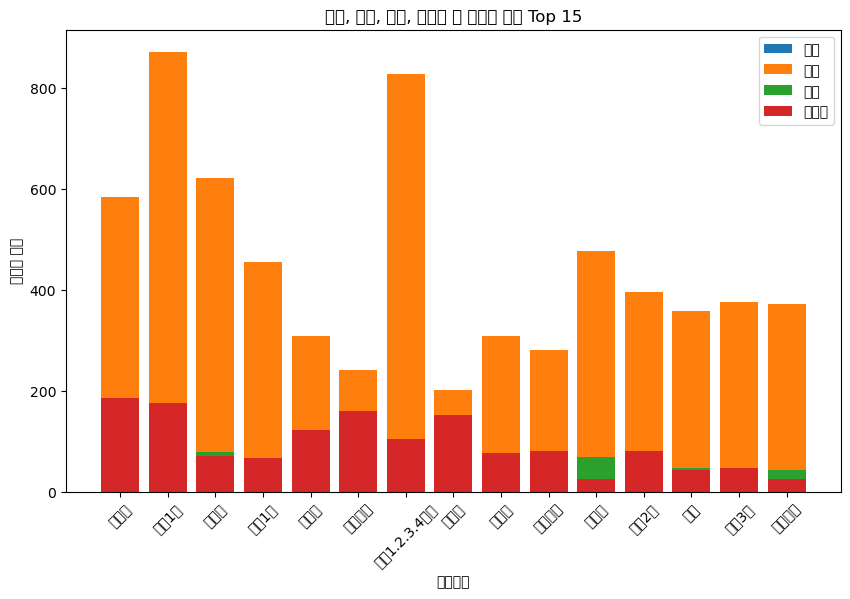

In [ ]:
df = store

# 필터링하여 조건에 해당하는 데이터 선택
filtered_df = df[df['상권업종중분류명'].isin(['일식', '한식', '중식', '서양식'])]

# 행정동별 개수 계산
grouped = filtered_df.groupby(['행정동명', '상권업종중분류명']).size().reset_index(name='count')

# 행정동별로 각 업종의 개수 합산
pivot_table = grouped.pivot(index='행정동명', columns='상권업종중분류명', values='count').fillna(0)

# 행정동별 업종 개수 합계 계산
pivot_table['Total'] = pivot_table.sum(axis=1)

# 행정동별 업종 개수 합계를 기준으로 내림차순 정렬하여 Top 15 선택
top15_hoods = pivot_table.nlargest(15, 'Total').index

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))

for category in ['일식', '한식', '중식', '서양식']:
    sorted_values = pivot_table.loc[top15_hoods, category].sort_values(ascending=False)
    ax.bar(sorted_values.index, sorted_values, label=category)

ax.legend()
plt.xlabel('행정동명')
plt.ylabel('데이터 개수')
plt.title('일식, 한식, 중식, 서양식 별 행정동 개수 Top 15')
plt.xticks(rotation=45)
plt.show()

In [10]:
selected_areas = ['성북구', '용산구', '강북구', '서대문구', '성동구', '도봉구', '중구', '남대문구']
filtered_df = store[store['시군구명'].isin(selected_areas)]

In [ ]:
selected_hoods = ['성북동', '삼선동', '동선동', '돈암1동', '돈암2동', '안암동', '보문동', '정릉1동', '정릉2동', '정릉3동', '정릉4동', '종암동', '길음1동', '길음2동', '월곡1동', '월곡2동', '장위1동', '장위2동', '장위3동', '석관동']

kmu_store_data = df[df['행정동명'].isin(selected_hoods)]

kmu_store_data.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,법정동코드,행정동명
25,삼미원,음식,중식,중국집,1129013300,정릉1동
80,레콜린스,소매,섬유·의복·신발 소매,여성 의류 소매업,1129010900,동선동
223,장위매점,소매,종합 소매,슈퍼마켓,1129013800,장위2동
394,참치요,음식,일식,일식 회/초밥,1129011300,삼선동
521,뚜레쥬르장위뉴타운,음식,기타 간이,빵/도넛,1129013800,장위3동


In [21]:
store = store.loc[store['상권업종대분류명'].isin(['음식', '소매'])]
excluded_categories = ['애완동물·용품 소매', '가구 소매', '담배 소매', '모터사이클 소매', '철물·건설자재 소매', '자동차 부품 소매', '연료 소매', '식물 소매', '비알코올', '식료품 소매', '동남아시아']
store = store[~store['상권업종중분류명'].isin(excluded_categories)]
store

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,법정동코드,법정동명,시군구명
0,영자's곱창,음식,한식,곱창 전골/구이,1121510100,중곡동,광진구
4,토끼정,음식,한식,백반/한정식,1150010500,마곡동,강서구
5,스쿨푸드딜리버리,음식,기타 간이,김밥/만두/분식,1130510300,수유동,강북구
6,가배차,음식,한식,백반/한정식,1171010400,송파동,송파구
7,비에이치씨항동점,음식,기타 간이,치킨,1153011200,항동,구로구
...,...,...,...,...,...,...,...
474243,연만두,음식,기타 간이,김밥/만두/분식,1144012300,망원동,마포구
474246,비기닝브레드,음식,기타 간이,빵/도넛,1135010300,공릉동,노원구
474250,용두홍어,음식,한식,횟집,1123010700,청량리동,동대문구
474251,신사답게,소매,섬유·의복·신발 소매,여성 의류 소매업,1156010400,영등포동3가,영등포구


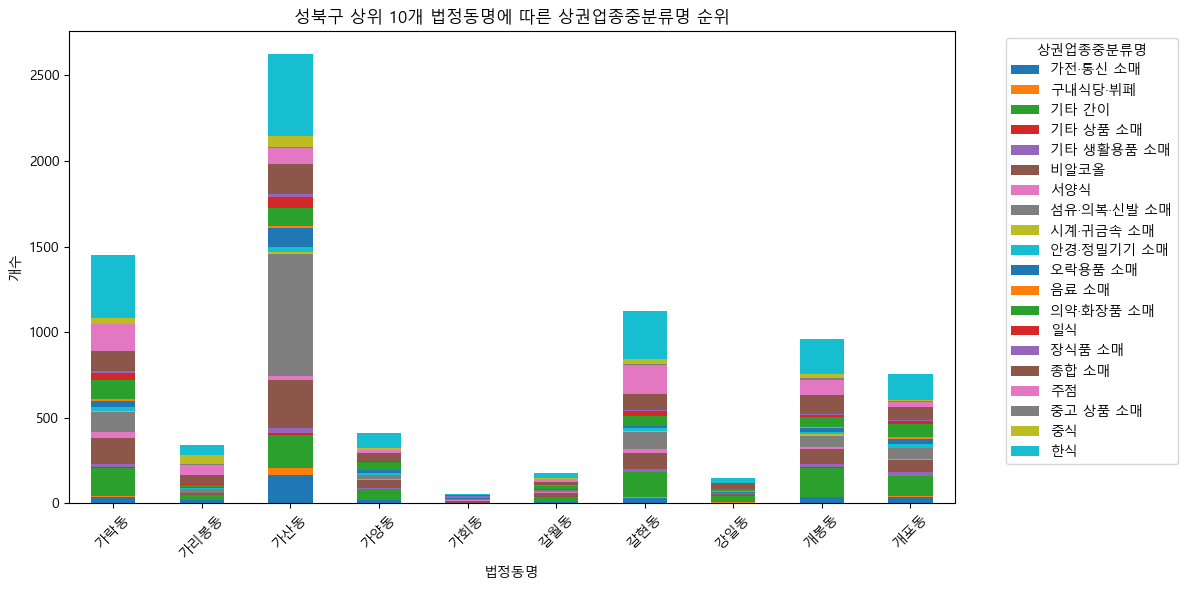

In [23]:
import matplotlib.pyplot as plt

df = store
# 행정동명과 상권업종중분류명에 대한 개수 계산
count_by_hood_category = df.groupby(['법정동명', '상권업종중분류명']).size().reset_index(name='count')

# 행정동명 기준으로 상권업종중분류명의 개수 순위 계산
rank_by_hood = count_by_hood_category.groupby('법정동명').apply(lambda x: x.sort_values(by='count', ascending=False)).reset_index(drop=True)

# 상위 10개 법정동명 선택
top_10_hoods = rank_by_hood['법정동명'].unique()[:10]
rank_by_hood_top10 = rank_by_hood[rank_by_hood['법정동명'].isin(top_10_hoods)]

# 시각화
fig, ax = plt.subplots(figsize=(12, 6))

pivot_table = rank_by_hood_top10.pivot_table(index='법정동명', columns='상권업종중분류명', values='count', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, ax=ax)

plt.xlabel('법정동명')
plt.ylabel('개수')
plt.title('성북구 상위 10개 법정동명에 따른 상권업종중분류명 순위')
plt.xticks(rotation=45)

plt.legend(title='상권업종중분류명', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()
